<div class="w3-bar w3-blue-grey w3-padding">
    <h2 class="w3-bar-item w3-padding-32"><!-- Text Here --></h2>
    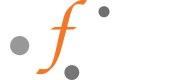
</div>

# Exploring History

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Overview%3A%0A"><i class="fa fa-file-o"></i> Overview:
</h3>
    <ul>
<li><strong>Teaching:</strong> 25 min</li>
<li><strong>Exercises:</strong> 0 min</li>
</ul>
<p><strong>Questions</strong></p>
<ul>
<li>How can I identify old versions of files?</li>
<li>How do I review my changes?</li>
<li>How can I recover old versions of files?</li>
</ul>
<p><strong>Objectives</strong></p>
<ul>
<li>Explain what the HEAD of a repository is and how to use it.</li>
<li>Identify and use Git commit numbers.</li>
<li>Compare various versions of tracked files.</li>
<li>Restore old versions of files.</li>
</ul>
</div>

As we saw in the previous lesson, we can refer to commits by their identifiers. You can refer to the most recent commit of the working directory by using the identifier `HEAD`.

We’ve been adding one line at a time to `mars.txt`, so it’s easy to track our progress by looking, so let’s do that using our `HEAD`s. Before we start, let’s make a change to `mars.txt`.
```bash
% nano mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
An ill-considered change
```

Now, let’s see what we get.
```bash
$ git diff HEAD mars.txt
```
```brainfuck
diff --git a/mars.txt b/mars.txt
index b36abfd..0848c8d 100644
--- a/mars.txt
+++ b/mars.txt
@@ -1,3 +1,4 @@
 Cold and dry, but everything is my favorite color
 The two moons may be a problem for Wolfman
 But the Mummy will appreciate the lack of humidity
+An ill-considered change.
```
which is the same as what you would get if you leave out `HEAD` (try it). The real goodness in all this is when you can refer to previous commits. We do that by adding ~1 to refer to the commit one before `HEAD`.

If we want to see the differences between older commits we can use git diff again, but with the notation HEAD~1, HEAD~2, and so on, to refer to them:

```bash
$ git diff HEAD~1 mars.txt
```

```bash
$ git diff HEAD~2 mars.txt
```

We could also use git show which shows us what changes we made at an older commit as well as the commit message, rather than the differences between a commit and our working directory that we see by using git diff.
```bash
$ git show HEAD~2 mars.txt
```
```brainfuck
commit 34961b159c27df3b475cfe4415d94a6d1fcd064d
Author: Vlad Dracula <vlad@tran.sylvan.ia>
Date:   Thu Aug 22 10:07:21 2013 -0400

    Start notes on Mars as a base

diff --git a/mars.txt b/mars.txt
new file mode 100644
index 0000000..df0654a
--- /dev/null
+++ b/mars.txt
@@ -0,0 +1 @@
+Cold and dry, but everything is my favorite color
```

In this way, we can build up a chain of commits. The most recent end of the chain is referred to as `HEAD`; we can refer to previous commits using the `~` notation, so `HEAD~1` (pronounced “head minus one”) means “the previous commit”, while `HEAD~123` goes back 123 commits from where we are now.

We can also refer to commits using those long strings of digits and letters that `git log` displays. These are unique IDs for the changes, and “unique” really does mean unique: every change to any set of files on any computer has a unique 40-character identifier. Our first commit was given the ID `f22b25e3233b4645dabd0d81e651fe074bd8e73b`, so let’s try this:
```bash
$ git diff f22b25e3233b4645dabd0d81e651fe074bd8e73b mars.txt
```
```brainfuck
diff --git a/mars.txt b/mars.txt
index df0654a..93a3e13 100644
--- a/mars.txt
+++ b/mars.txt
@@ -1 +1,4 @@
 Cold and dry, but everything is my favorite color
+The two moons may be a problem for Wolfman
+But the Mummy will appreciate the lack of humidity
+An ill-considered change
```

All right! So we can save changes to files and see what we’ve changednow how can we restore older versions of things? Let’s suppose we accidentally overwrite our file:
```bash
% nano mars.txt
% cat mars.txt
```
```brainfuck
We will need to manufacture our own oxygen
```
`git status` now tells us that the file has been changed, but those changes haven’t been staged:
```bash
$ git status
```
```brainfuck
On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   mars.txt

no changes added to commit (use "git add" and/or "git commit -a")
```

We can put things back the way they were by using git checkout:
```bash
$ git checkout HEAD mars.txt
$ cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
The two moons may be a problem for Wolfman
But the Mummy will appreciate the lack of humidity
```

As you might guess from its name, `git checkout` checks out (i.e., restores) an old version of a file. In this case, we’re telling Git that we want to recover the version of the file recorded in `HEAD`, which is the last saved commit. If we want to go back even further, we can use a commit identifier instead:
```bash
% git checkout f22b25e mars.txt
% cat mars.txt
```
```brainfuck
Cold and dry, but everything is my favorite color
```
```bash
$ git status
```
```brainfuck
# On branch master
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)
# Changes not staged for commit:
#   (use "git add <file>..." to update what will be committed)
#   (use "git checkout -- <file>..." to discard changes in working directory)
#
#	modified:   mars.txt
#
no changes added to commit (use "git add" and/or "git commit -a")
```
Notice that the changes are on the staged area. Again, we can put things back the way they were by using `git checkout`:
```bash
% git checkout HEAD mars.txt
```

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Don%E2%80%99t-Lose-Your-HEAD%0A"><i class="fa fa-info-circle"></i> Don’t Lose Your HEAD
</h3>
    <p>Above we used</p>
<div class="highlight"><pre><span></span>% git checkout f22b25e mars.txt
</pre></div>
<p>to revert <code>mars.txt</code> to its state after the commit <code>f22b25e.</code> If you forget <code>mars.txt</code> in that command, Git will tell you that “You are in ‘detached HEAD’ state.” In this state, you shouldn’t make any changes. You can fix this by reattaching your head using <code>git checkout master</code></p>
</div>

It’s important to remember that we must use the commit number that identifies the state of the repository before the change we’re trying to undo. A common mistake is to use the number of the commit in which we made the change we’re trying to get rid of. In the example below, we want to retrieve the state from before the most recent commit (`HEAD~1`), which is commit `f22b25e`:
![Git chekcout](../images/git-checkout.svg)
So, to put it all together, here’s how Git works in cartoon form:
![Git staging](../images/git_staging.svg)

<div class="w3-panel w3-leftbar w3-border-blue w3-pale-blue w3-padding-small">
    <h3 id="-Simplifying-the-Common-Case%0A"><i class="fa fa-info-circle"></i> Simplifying the Common Case
</h3>
    <p>If you read the output of git status carefully, you’ll see that it includes this hint:</p>
<div class="highlight"><pre><span></span><span class="c">(use &quot;git checkout </span><span class="nb">--</span><span class="c"> </span><span class="nv">&lt;</span><span class="c">file</span><span class="nv">&gt;</span><span class="nt">...</span><span class="c">&quot; to discard changes in working directory)</span>
</pre></div>
<p>As it says, <code>git checkout</code> without a version identifier restores files to the state saved in <code>HEAD</code>. The double dash <code>--</code> is needed to separate the names of the files being recovered from the command itself: without it, Git would try to use the name of the file as the commit identifier.</p>
</div>

The fact that files can be reverted one by one tends to change the way people organize their work. If everything is in one large document, it’s hard (but not impossible) to undo changes to the introduction without also undoing changes made later to the conclusion. If the introduction and conclusion are stored in separate files, on the other hand, moving backward and forward in time becomes much easier.

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Recovering-Older-Versions-of-a-File%0A"><i class="fa fa-pencil-square-o"></i> Recovering Older Versions of a File
</h3>
    <p>Jennifer has made changes to the Python script that she has been working on for weeks, and the modifications she made this morning “broke” the script and it no longer runs. She has spent ~ 1hr trying to fix it, with no luck…</p>
<p>Luckily, she has been keeping track of her project’s versions using Git! Which commands below will let her recover the last committed version of her Python script called data_cruncher.py?</p>
<ol>
<li><div class="highlight"><pre><span></span>% git checkout HEAD<span class="sb">`</span>
</pre></div>
</li>
<li><div class="highlight"><pre><span></span>% git checkout HEAD data_cruncher.py<span class="sb">`</span>
</pre></div>
</li>
<li><div class="highlight"><pre><span></span>% git checkout HEAD~1 data_cruncher.py<span class="sb">`</span>
</pre></div>
</li>
<li><div class="highlight"><pre><span></span>% git checkout &lt;unique ID of last commit&gt; data_cruncher.py<span class="sb">`</span>
</pre></div>
</li>
<li><div class="highlight"><pre><span></span>Both <span class="m">2</span> and <span class="m">4</span>
</pre></div>
</li>
</ol>
</div>

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Checking-Understanding-of-git-diff%0A"><i class="fa fa-pencil-square-o"></i> Checking Understanding of git diff
</h3>
    <p>Consider this command: <code>git diff HEAD~3 mars.txt</code>. What do you predict this command will do if you execute it? What happens when you do execute it? Why?</p>
<p>Try another command, <code>git diff [ID] mars.txt</code>, where [ID] is replaced with the unique identifier for your most recent commit. What do you think will happen, and what does happen?</p>
</div>

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Getting-Rid-of-Staged-Changes%0A"><i class="fa fa-pencil-square-o"></i> Getting Rid of Staged Changes
</h3>
    <p><code>git checkout</code> can be used to restore a previous commit when unstaged changes have been made, but will it also work for changes that have been staged but not committed? Make a change to <code>mars.txt</code>, add that change, and use <code>git checkout</code> to see if you can remove your change.</p>
</div>

<div class="w3-panel w3-leftbar w3-border-yellow w3-pale-yellow w3-padding-small">
    <h3 id="-Explore-and-Summarize-Histories%0A"><i class="fa fa-pencil-square-o"></i> Explore and Summarize Histories
</h3>
    <p>Exploring history is an important part of git, often it is a challenge to find the right commit ID, especially if the commit is from several months ago.</p>
<p>Imagine the <code>planets</code> project has more than 50 files. You would like to find a commit with specific text in <code>mars.txt</code> is modified. When you type <code>git log</code>, a very long list appeared, How can you narrow down the search?</p>
<p>Recall that the <code>git diff</code> command allow us to explore one specific file, e.g. <code>git diff mars.txt</code>. We can apply a similar idea here.</p>
<div class="highlight"><pre><span></span>% git log mars.txt
</pre></div>
<p>Unfortunately some of these commit messages are very ambiguous e.g. update files. How can you search through these files?</p>
<p>Both <code>git diff</code> and <code>git log</code> are very useful and they summarize a different part of the history for you. Is it possible to combine both? Let’s try the following:</p>
<div class="highlight"><pre><span></span>% git log --patch mars.txt
</pre></div>
<p>You should get a long list of output, and you should be able to see both commit messages and the difference between each commit.</p>
<p>Question: What does the following command do?</p>
<div class="highlight"><pre><span></span>% git log --patch HEAD~3 &ast;.txt
</pre></div>
<p>While we all try to provide useful commit messages <code>git</code> provides the tools to help use understand even our least nformative commit messages, through the combination of specific commit ids and files.</p>
</div>

<div class="w3-panel w3-leftbar w3-border-green w3-pale-green w3-padding-small">
    <h3 id="-Key-Points%3A%0A"><i class="fa fa-key"></i> Key Points:
</h3>
    <ul>
<li><code>git diff</code> displays differences between commits.</li>
<li><code>git checkout &lt;commit id&gt; &lt;file&gt;</code> recovers old versions of files.</li>
</ul>
</div>

<div class="w3-bar w3-blue-grey">
<a href="./04_episode.ipynb" class="w3-left-align w3-bar-item w3-button w3-mobile" style="width:33%"><h2><i class="fa fa-angle-double-left"></i> Previous</h2></a>
<a href="./00_schedule.ipynb" class="w3-bar-item w3-button w3-center w3-mobile" style="width:33%"><h2>Schedule</h2></a>
<a href="./06_episode.ipynb" class="w3-right-align w3-bar-item w3-button w3-right w3-mobile" style="width:33%"><h2>Next <i class="fa fa-angle-double-right"></i></h2></a>
</div>